# Feature importances with forests of trees
ref: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [107]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [108]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 1.5.3
numpy   version: 1.24.3
seaborn version: 0.12.2


In [109]:
import os

In [110]:
# Set default working directory
os.getcwd()

'C:\\Users\\ken.kaya\\OneDrive - EZECOM\\Ezecom\\Data Bootcamp\\3. Machine Learning\\Lecture'

### Data Dictionary
source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension (blood pressure)
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

In [111]:
url='healthcare-dataset-stroke-data.csv'
df=pd.read_csv(url)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [113]:
df['id'].value_counts()

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64

In [114]:
# Check for NaN values in the dataset
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [115]:
# Check for missing values in the 'bmi' column
print("Missing values in 'bmi' column:", df['bmi'].isnull().sum())

Missing values in 'bmi' column: 201


In [116]:
# Method 1: Mean Imputation
# Fill missing values in 'bmi' with the mean value of the column
mean_imputer = SimpleImputer(strategy='mean')
df['bmi_mean_imputed'] = mean_imputer.fit_transform(df[['bmi']])

In [117]:
# Method 2: KNN Imputation
# Fill missing values in 'bmi' using KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df['bmi_knn_imputed'] = knn_imputer.fit_transform(df[['bmi']])

In [118]:
# Check for missing values after imputation
print("Missing values in 'bmi_mean_imputed' column:", df['bmi_mean_imputed'].isnull().sum())
print("Missing values in 'bmi_knn_imputed' column:", df['bmi_knn_imputed'].isnull().sum())

Missing values in 'bmi_mean_imputed' column: 0
Missing values in 'bmi_knn_imputed' column: 0


In [119]:
# Check for NaN values in the dataset
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
bmi_mean_imputed       0
bmi_knn_imputed        0
dtype: int64


In [120]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_mean_imputed,bmi_knn_imputed
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.600000,36.600000
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,28.893237,28.893237
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.500000,32.500000
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.400000,34.400000
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.000000,24.000000
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,29.000000,29.000000
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,27.400000,27.400000
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,22.800000,22.800000
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,28.893237,28.893237
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,24.200000,24.200000


In [121]:
df.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke  bmi_mean_imputed  bmi_knn_imputed
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0       18.6              18.6               1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0       31.0              31.0               1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0       29.2              29.2               1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0       26.5              26.5               1
49645  Male    58.0  0             0              No            Private        Rural 

In [122]:
# Drop a specific column, for example, 'column_to_drop'
df.drop('bmi', axis=1, inplace=True)

### pairplot

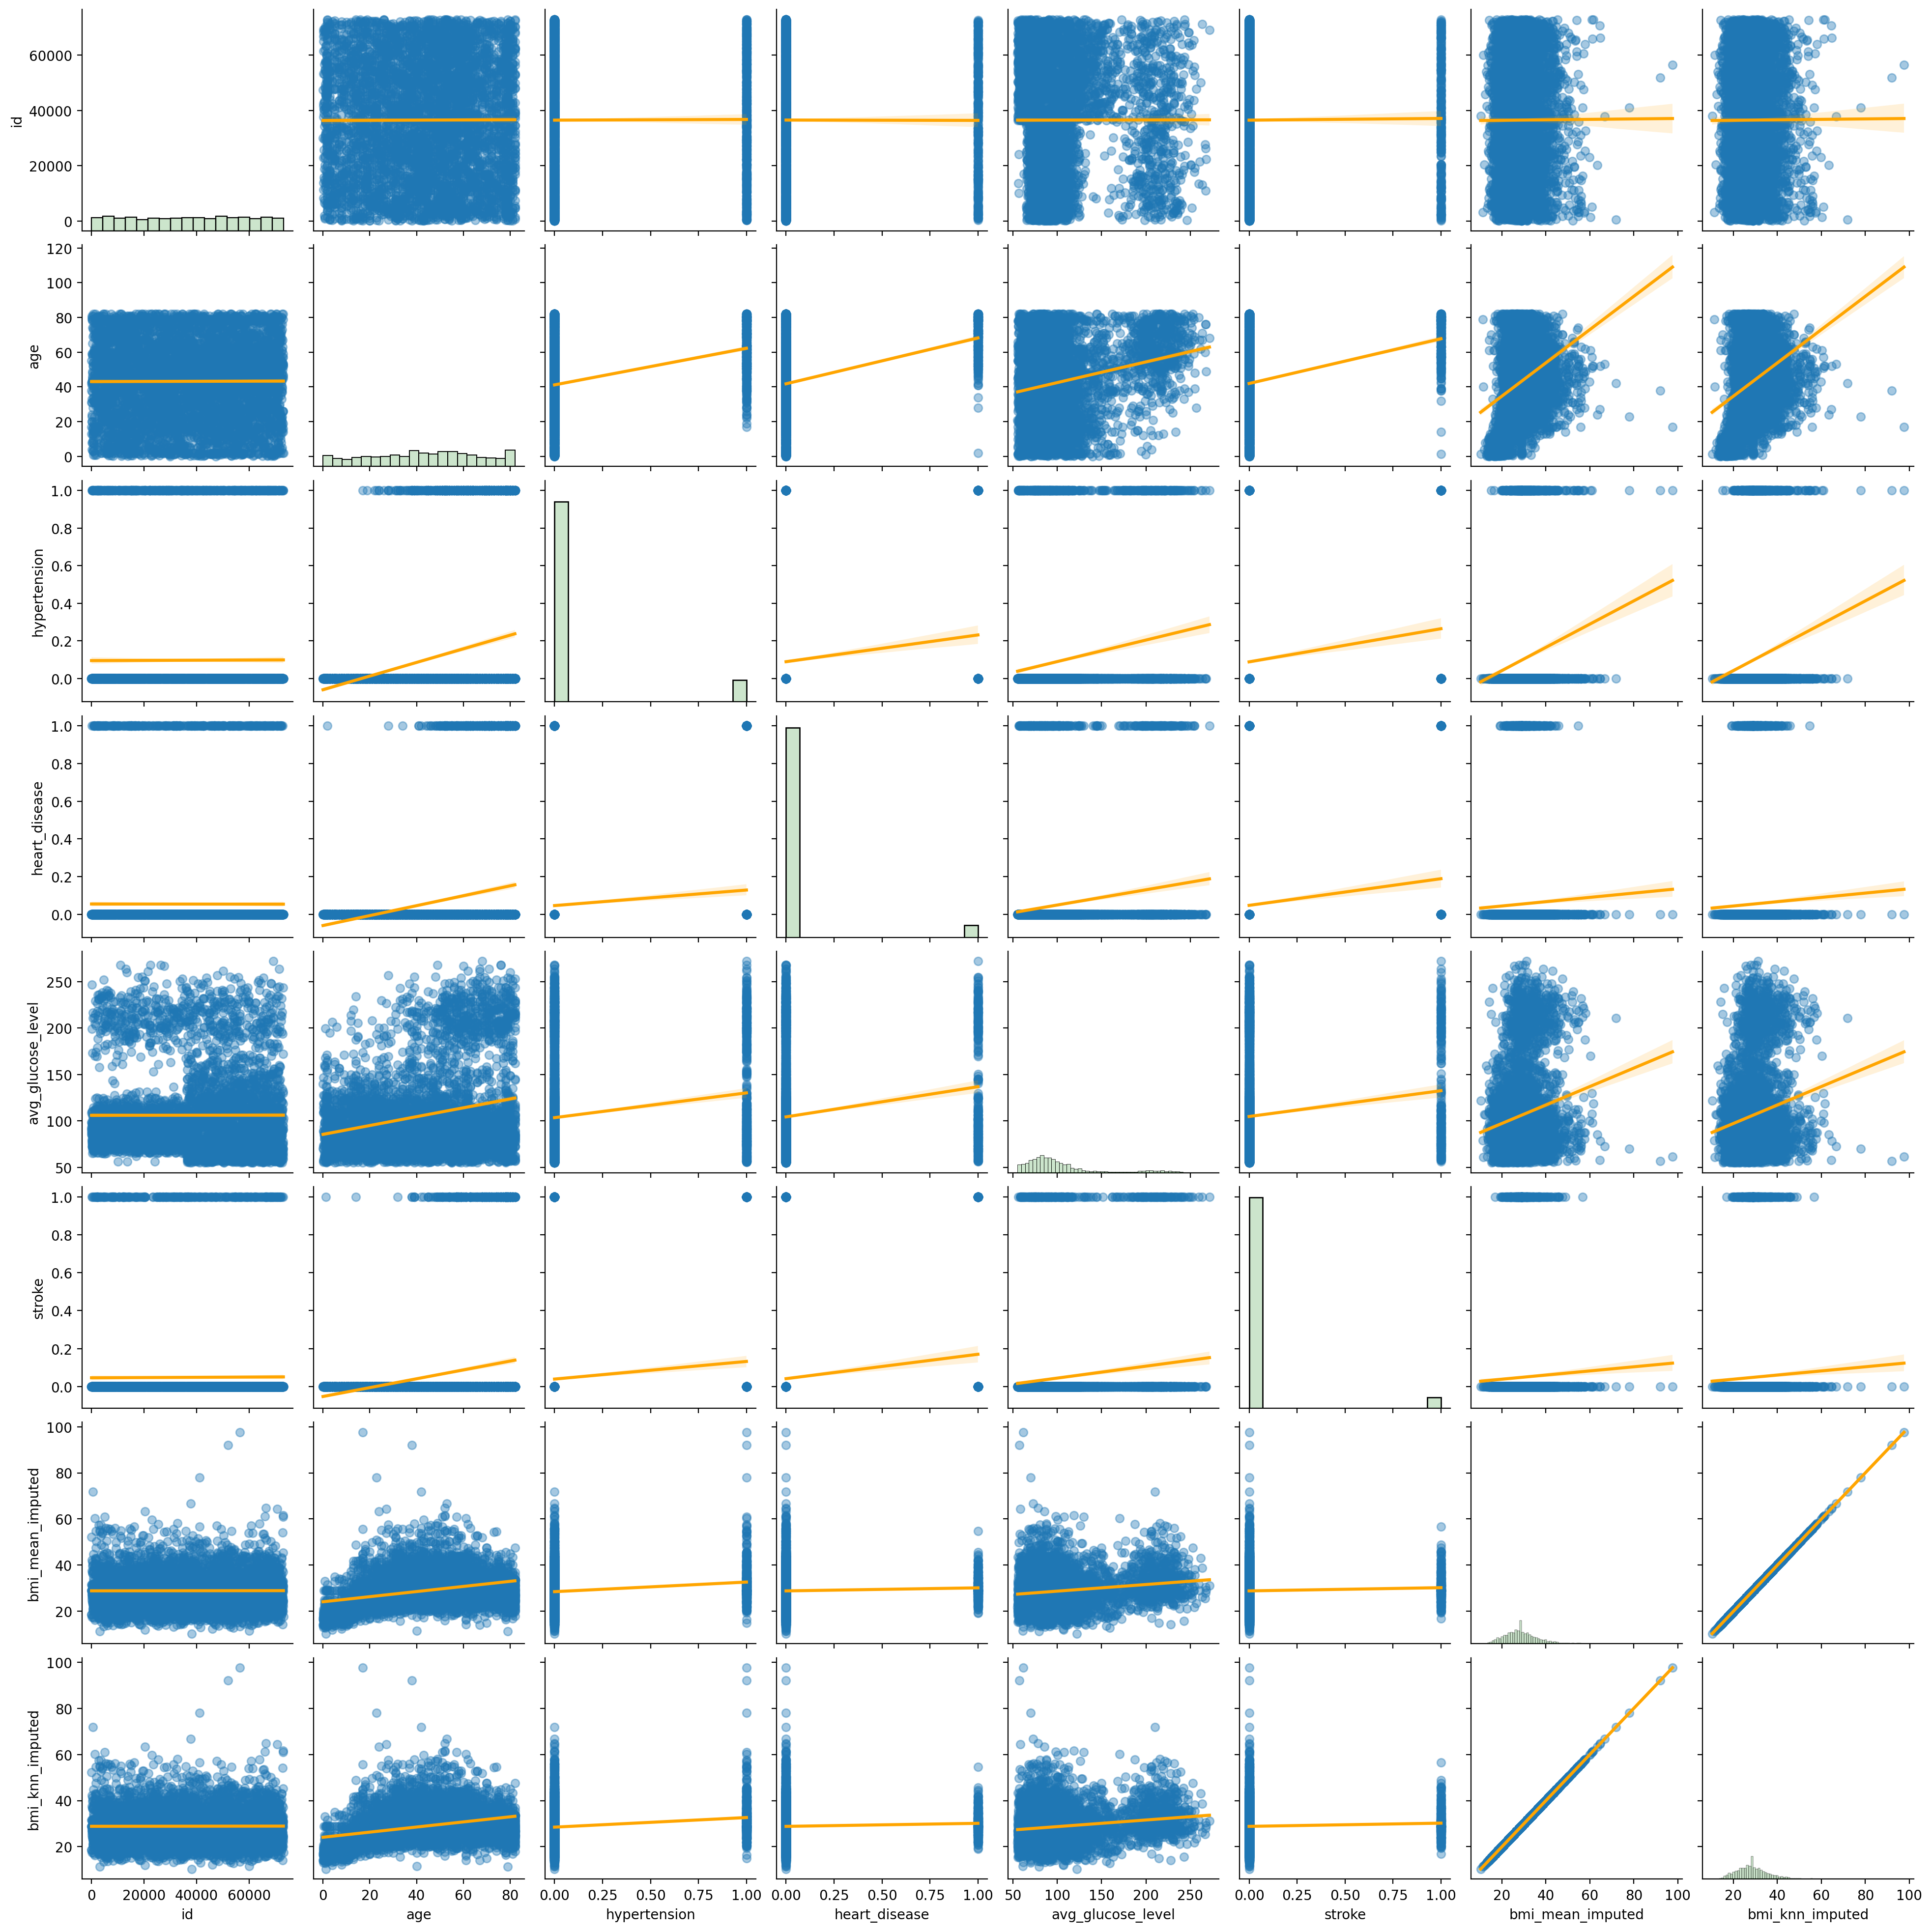

In [123]:
sns.pairplot(df,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

### headmap

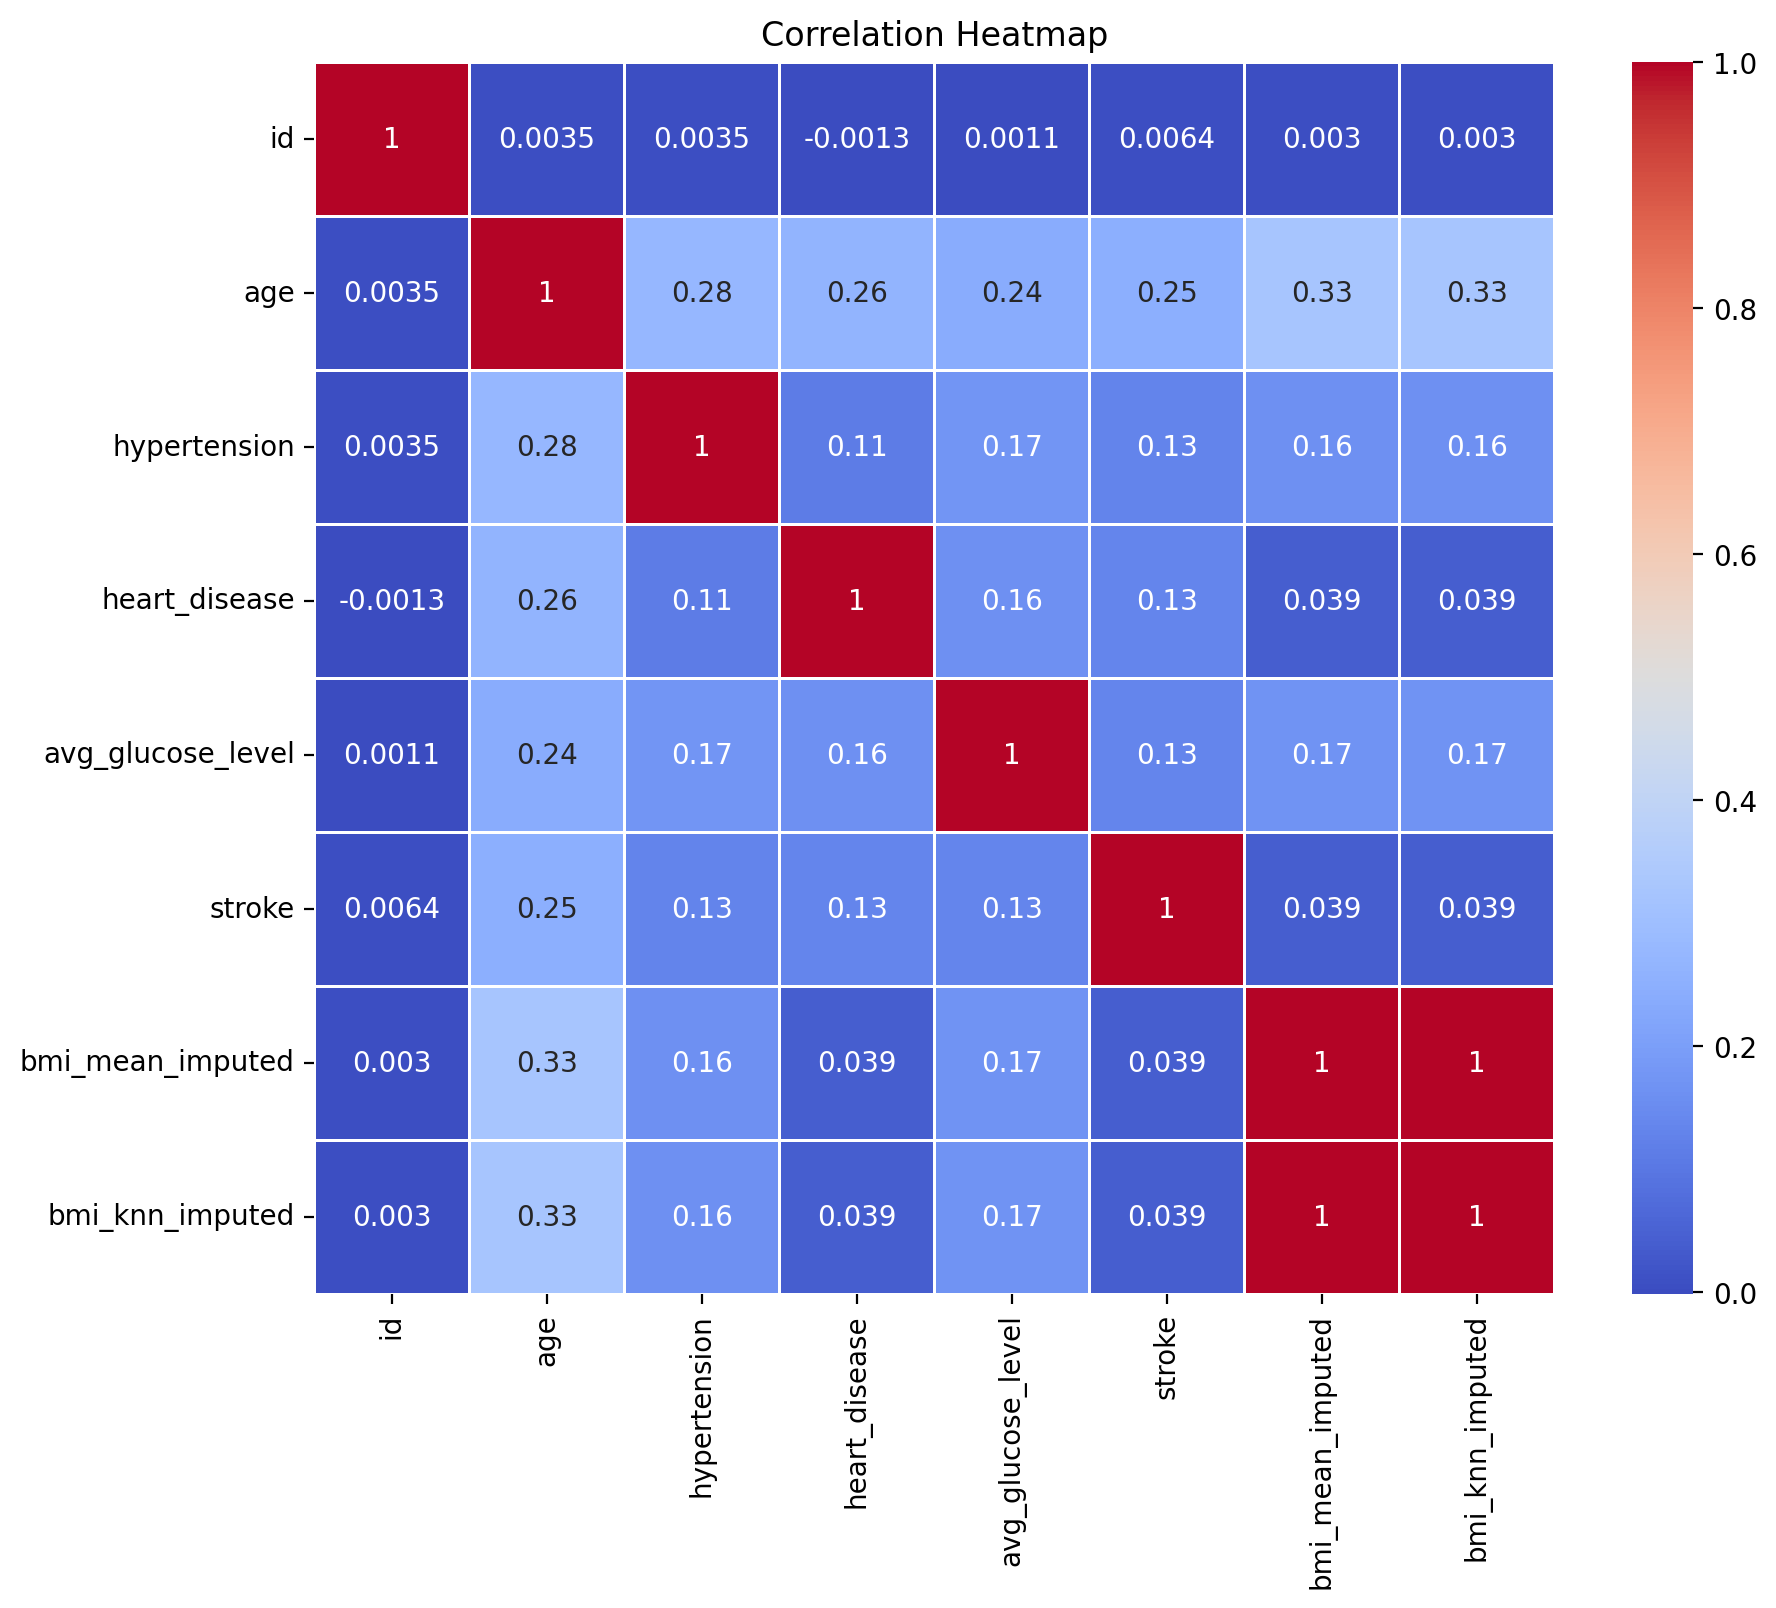

In [124]:
# Calculate the correlation matrix for numerical columns only
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [125]:
# Drop a specific column, for example, 'column_to_drop'
df.drop('bmi_knn_imputed', axis=1, inplace=True)

In [126]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_mean_imputed
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.600000
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.893237
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.500000
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.400000
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.000000
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,formerly smoked,1,29.000000
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,never smoked,1,27.400000
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,never smoked,1,22.800000
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,Unknown,1,28.893237
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,Unknown,1,24.200000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  bmi_mean_imputed   5110 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Encoding 'object' feature using "Label Encoding"

In [128]:
# Identify object columns
object_columns = df.select_dtypes(include='object').columns

# Perform label encoding on object columns
label_encoder = LabelEncoder()

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print the first few rows of the encoded DataFrame
print(df.head())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level  smoking_status  stroke  bmi_mean_imputed  
0               1             228.69               1       1         36.600000  
1               0             202.21               2       1         28.893237  
2               0             105.92               2       1         32.500000  
3               1             171.23               3       1         34.400000  
4               0             174.12               2       1         24.000000  


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
 11  bmi_mean_imputed   5110 non-null   float64
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


## sklearn: Classifier

In [130]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [131]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.2


In [137]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status',
       'stroke', 'bmi_mean_imputed'],
      dtype='object')

In [149]:
#feature selection
# model= DecisionTreeClassifier(random_state=7)
modelGBC= GradientBoostingClassifier(n_estimators=250, random_state=7)
modelRFC= RandomForestClassifier(n_estimators=250, random_state=7)
modelETC= ExtraTreesClassifier(n_estimators=250, random_state=7)

X=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status','bmi_mean_imputed']]
y=df['stroke']
modelGBC.fit(X,y)
modelRFC.fit(X,y)
modelETC.fit(X,y)

ExtraTreesClassifier(n_estimators=250, random_state=7)

In [161]:
print('GradientBoostingClassifier')
modelGBC.feature_importances_

GradientBoostingClassifier


array([0.01149256, 0.32910777, 0.01897687, 0.03197681, 0.01344246,
       0.01293634, 0.00720699, 0.37374048, 0.02996049, 0.17115924])

In [162]:
print('RandomForestClassifier')
modelRFC.feature_importances_

RandomForestClassifier


array([0.03106346, 0.22737558, 0.02512214, 0.0218763 , 0.01851362,
       0.04946138, 0.0335096 , 0.28939347, 0.06909386, 0.23459059])

In [163]:
print('ExtraTreesClassifier')
modelETC.feature_importances_

ExtraTreesClassifier


array([0.03267438, 0.25293526, 0.02242074, 0.02061966, 0.0183747 ,
       0.05808889, 0.0365713 , 0.25209451, 0.08683763, 0.21938292])

### Summary Result

In [171]:
fsGBC=pd.Series(modelGBC.feature_importances_, index=X.columns).sort_values(ascending=True)
print('GradientBoostingClassifier')
fsGBC

GradientBoostingClassifier


Residence_type       0.007207
gender               0.011493
work_type            0.012936
ever_married         0.013442
hypertension         0.018977
smoking_status       0.029960
heart_disease        0.031977
bmi_mean_imputed     0.171159
age                  0.329108
avg_glucose_level    0.373740
dtype: float64

In [172]:
fsRFC=pd.Series(modelRFC.feature_importances_, index=X.columns).sort_values(ascending=True)
print('RandomForestClassifier')
fsRFC

RandomForestClassifier


ever_married         0.018514
heart_disease        0.021876
hypertension         0.025122
gender               0.031063
Residence_type       0.033510
work_type            0.049461
smoking_status       0.069094
age                  0.227376
bmi_mean_imputed     0.234591
avg_glucose_level    0.289393
dtype: float64

In [173]:
fsETC=pd.Series(modelETC.feature_importances_, index=X.columns).sort_values(ascending=True)
print('ExtraTreesClassifier')
fsETC

ExtraTreesClassifier


ever_married         0.018375
heart_disease        0.020620
hypertension         0.022421
gender               0.032674
Residence_type       0.036571
work_type            0.058089
smoking_status       0.086838
bmi_mean_imputed     0.219383
avg_glucose_level    0.252095
age                  0.252935
dtype: float64

In [174]:
print('GradientBoostingClassifier: ', fsGBC.sum())
print('RandomForestClassifier: ', fsRFC.sum())
print('ExtraTreesClassifier: ', fsETC.sum())

GradientBoostingClassifier:  1.0
RandomForestClassifier:  1.0
ExtraTreesClassifier:  1.0


GradientBoostingClassifier: 


<Axes: >

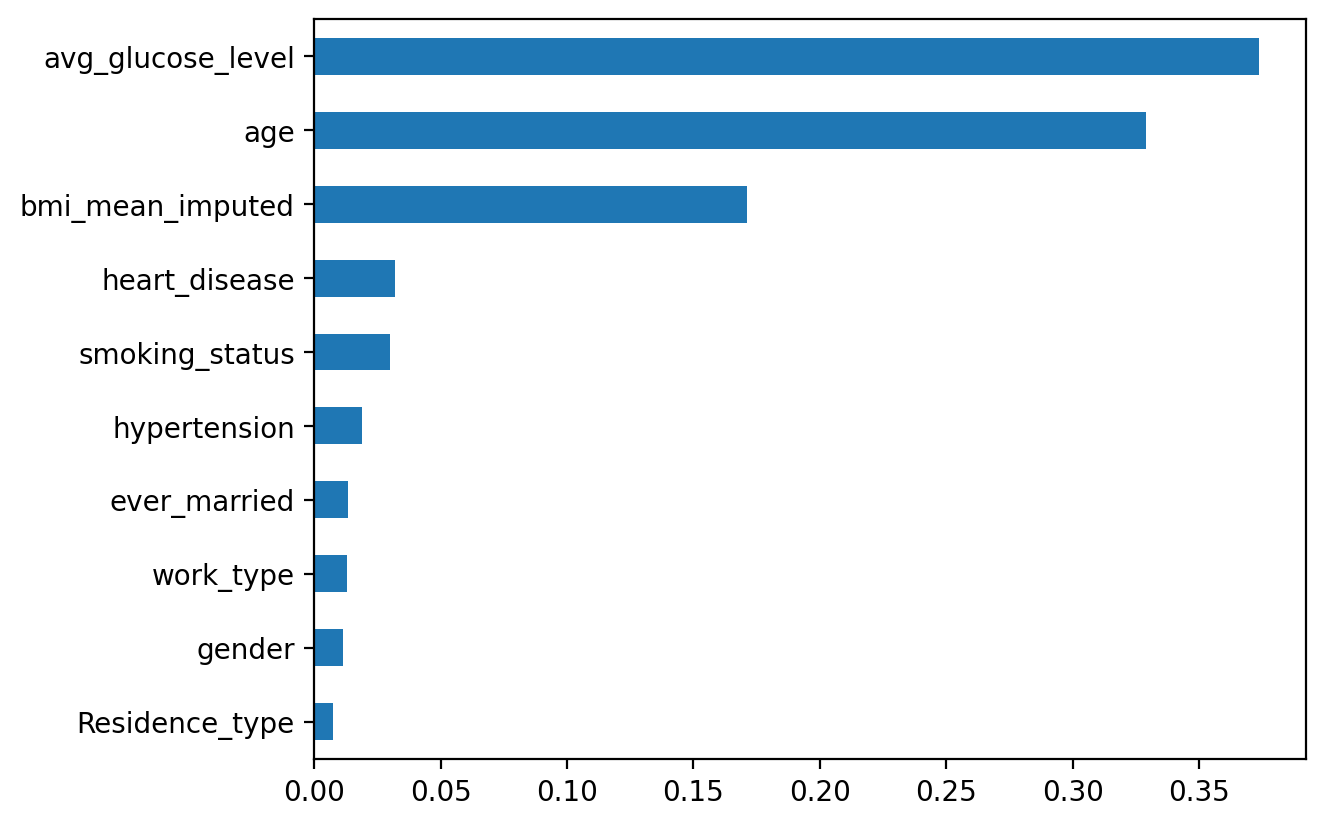

In [178]:
print('GradientBoostingClassifier: ')
fsGBC.plot(kind='barh')

RandomForestClassifier: 


<Axes: >

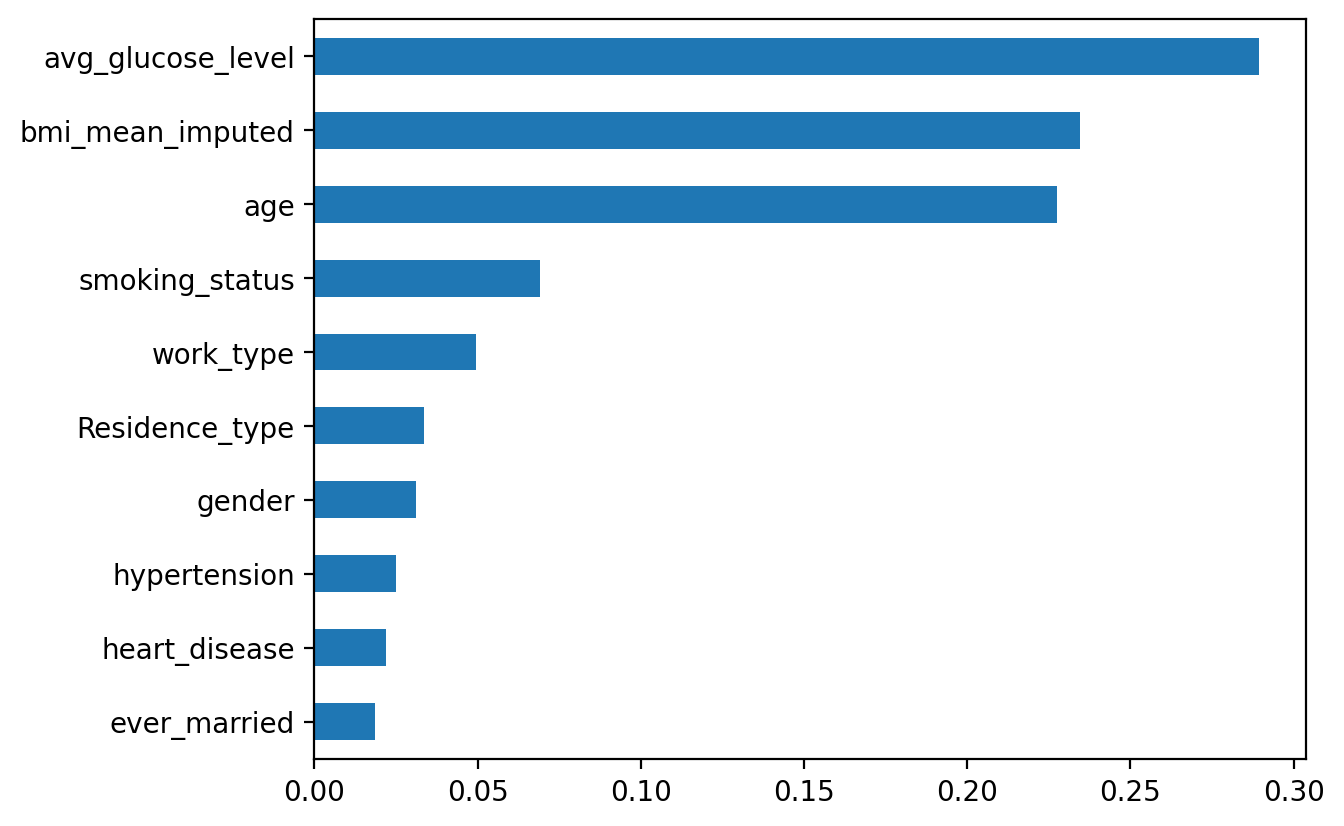

In [180]:
print('RandomForestClassifier: ')
fsRFC.plot(kind='barh')

ExtraTreesClassifier: 


<Axes: >

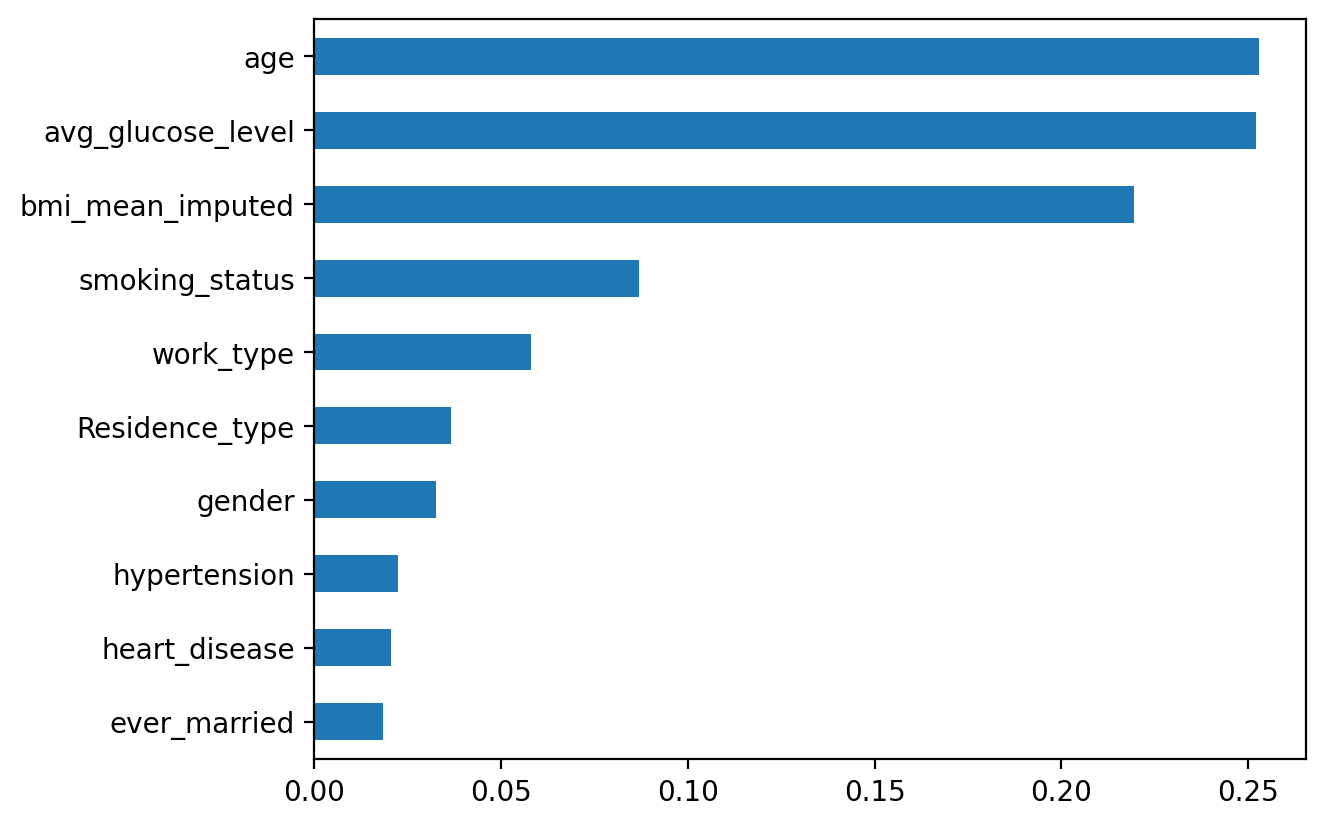

In [181]:
print('ExtraTreesClassifier: ')
fsETC.plot(kind='barh')

In [ ]:
print('GradientBoostingClassifier: ', fsGBC.sum())
print('RandomForestClassifier: ', fsRFC.sum())
print('ExtraTreesClassifier: ', fsETC.sum())

In [188]:
print('GradientBoostingClassifier: ')
print(fsGBC[fsGBC > .1])
print()
print('RandomForestClassifier: ')
print(fsRFC[fsRFC > .1])
print()
print('ExtraTreesClassifier: ')
print(fsETC[fsETC > .1])

GradientBoostingClassifier: 
bmi_mean_imputed     0.171159
age                  0.329108
avg_glucose_level    0.373740
dtype: float64

RandomForestClassifier: 
age                  0.227376
bmi_mean_imputed     0.234591
avg_glucose_level    0.289393
dtype: float64

ExtraTreesClassifier: 
bmi_mean_imputed     0.219383
avg_glucose_level    0.252095
age                  0.252935
dtype: float64


In [144]:
fs.nlargest(4) #.index

avg_glucose_level    0.373740
age                  0.329108
bmi_mean_imputed     0.171159
heart_disease        0.031977
dtype: float64

In [190]:
print('GradientBoostingClassifier: ')
print(fsGBC[fsGBC > .1].index)
print()
print('RandomForestClassifier: ')
print(fsRFC[fsRFC > .1].index)
print()
print('ExtraTreesClassifier: ')
print(fsETC[fsETC > .1].index)

GradientBoostingClassifier: 
Index(['bmi_mean_imputed', 'age', 'avg_glucose_level'], dtype='object')

RandomForestClassifier: 
Index(['age', 'bmi_mean_imputed', 'avg_glucose_level'], dtype='object')

ExtraTreesClassifier: 
Index(['bmi_mean_imputed', 'avg_glucose_level', 'age'], dtype='object')


### Using "GradientBoostingClassifier" give higher value, so will take GradientBoostingClassifier to proceed further analysis

In [193]:
X=df[fsGBC[fsGBC > .1].index]
X.head()

,bmi_mean_imputed,age,avg_glucose_level
0,36.600000,67.0,228.69
1,28.893237,61.0,202.21
2,32.500000,80.0,105.92
3,34.400000,49.0,171.23
4,24.000000,79.0,174.12


In [195]:
#X=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status', 'bmi_mean_imputed']]
X=df[['bmi_mean_imputed', 'age', 'avg_glucose_level']]
# X=df[fs[fs > .1].index]
y=df['stroke']

In [196]:
# use stratify to split train/test
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=7)

## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [197]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'],
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.9432
[[1445   13]
 [  74    1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.07      0.01      0.02        75

    accuracy                           0.94      1533
   macro avg       0.51      0.50      0.50      1533
weighted avg       0.91      0.94      0.92      1533

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.9511
[[1458    0]
 [  75    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

----------------------------------------------------------------------------------------------------
Perceptron          

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier score: 0.9504
[[1455    3]
 [  73    2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.40      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.68      0.51      0.51      1533
weighted avg       0.93      0.95      0.93      1533

----------------------------------------------------------------------------------------------------
RandomForestClassifier score: 0.9452
[[1447   11]
 [  73    2]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.15      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.55      0.51      0.51      1533
weighted avg       0.91      0.95      0.93      1533

----------------------------------------------------------------------------------------------------
BaggingClass

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC_linear           score: 0.9511
[[1458    0]
 [  75    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

----------------------------------------------------------------------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianProcessClassifier score: 0.9224
[[1403   55]
 [  64   11]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.17      0.15      0.16        75

    accuracy                           0.92      1533
   macro avg       0.56      0.55      0.56      1533
weighted avg       0.92      0.92      0.92      1533

----------------------------------------------------------------------------------------------------
[[0.9432485322896281, 'KNeighborsClassifier'], [0.9510763209393346, 'LogisticRegression'], [0.9465101108936725, 'Perceptron'], [0.9262883235485975, 'DecisionTreeClassifier'], [0.9504240052185258, 'GradientBoostingClassifier'], [0.9452054794520548, 'RandomForestClassifier'], [0.9399869536855838, 'BaggingClassifier'], [0.9497716894977168, 'AdaBoostClassifier'], [0.9171559034572733, 'GaussianNB'], [0.9510763209393346, 'MLPClassifier'], [0.9510763209393346, 'SVC_linear'], [0.9223744292237442, 'GaussianPr

In [199]:
model_scores

[[0.9432485322896281, 'KNeighborsClassifier'],
 [0.9510763209393346, 'LogisticRegression'],
 [0.9465101108936725, 'Perceptron'],
 [0.9262883235485975, 'DecisionTreeClassifier'],
 [0.9504240052185258, 'GradientBoostingClassifier'],
 [0.9452054794520548, 'RandomForestClassifier'],
 [0.9399869536855838, 'BaggingClassifier'],
 [0.9497716894977168, 'AdaBoostClassifier'],
 [0.9171559034572733, 'GaussianNB'],
 [0.9510763209393346, 'MLPClassifier'],
 [0.9510763209393346, 'SVC_linear'],
 [0.9223744292237442, 'GaussianProcessClassifier']]

In [200]:
dscore=pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore.sort_values('score', ascending=False)

,score,classifier
1,0.951076,LogisticRegression
9,0.951076,MLPClassifier
10,0.951076,SVC_linear
4,0.950424,GradientBoostingClassifier
7,0.949772,AdaBoostClassifier
2,0.946510,Perceptron
5,0.945205,RandomForestClassifier
0,0.943249,KNeighborsClassifier
6,0.939987,BaggingClassifier
3,0.926288,DecisionTreeClassifier
